Predicting the Compressive Strength of Concrete 
with YELLOWBRICK

# Step:-1  importing libraries

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [10]:

%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (9,6)

# step:-2 Dataset exploration

In [11]:
df=pd.read_csv('datasets_31874_41246_Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# step:- 3 Preprocessing the Data

In [12]:
df.columns = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']
X = df.drop('strength', axis=1)
y = df['strength']


# step:-4 Create the train and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# step:-5 Residuals Plot

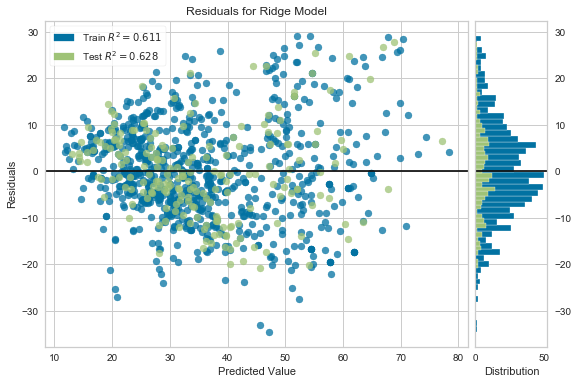

In [14]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

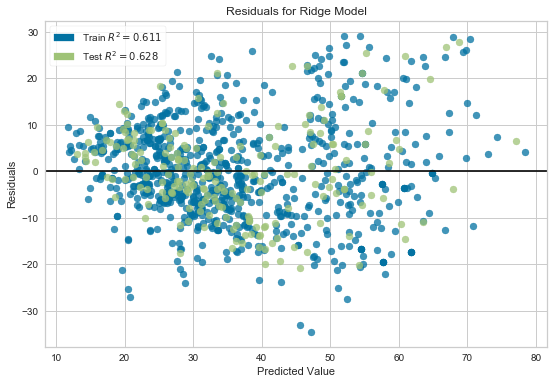

In [15]:
# without histogram
model = Ridge()
visualizer = ResidualsPlot(model, hist=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

# step:-6 Prediction Error Plot

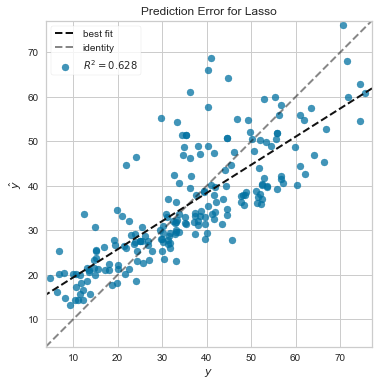

In [16]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

# step:-7 Alpha Selection Visualizer

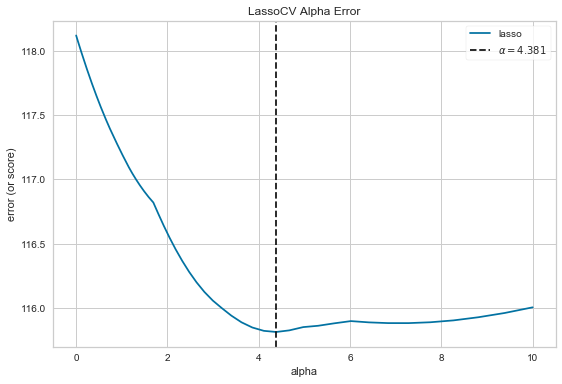

In [17]:
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer 
model = LassoCV(alphas=alphas, cv=3)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)              # Fit the data to the visualizer
g = visualizer.poof()             # Draw/show/poof the data